TODO:

* Explore the data to undercover discrepensies and patterns
  * use the previous assignments and weeks plots to help

* Choose an interesting data story
  * time of day and day of week crime rates
  * neighborhood crime rates and types

* Homepage showing NYPD safe areas green and unsafe areas red for a given time period
  * helps guide average NYC citizen to safer travel routes/areas



Feedback:

Maps - City maps change over time - make sure the map is true to reality - e.g. the island in San Francisco was not always there

Remember to add something interesting in between charts

What if the police made a mistake? 

New YOrk police has lots of problems - look at trneds and Public opinion
- Has the Global/National opinion changed over time?
- Cultural association on the police

Low scale
- what are the complaints about 
- Are there some valid
- Some invalid complaints - specific person, story or motive to fake a complaint

Make sure to guide - by adding explanations and analysis


Socio-economic factors - how do they affect the crime rate - median income and unemployment rate

Look at NaN values - should we remove or fill them in with a value (mean, median, mode)

In [1]:
# Load data
import pandas as pd
import seaborn as sns
import plotly.express as px
import json
import numpy as np
import os

# Re the NYPD policing data
cwd = os.getcwd()
print(cwd)
parent_dir = os.path.dirname(cwd)
print(parent_dir)
filename = 'NYPD_Complaint_Data_Current__Year_To_Date__20240410.csv'
df = pd.read_csv(filename)
#focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

c:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data analysis and visualisation\Exam Project
c:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data analysis and visualisation


In [2]:
print(df.head())

    CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0    269235387         42.0     BRONX   06/03/2023     01:00:00          NaN   
1    262102261         43.0     BRONX   01/18/2023     14:00:00          NaN   
2    267972239         43.0     BRONX   05/07/2023     00:15:00          NaN   
3  263141402H1          NaN  BROOKLYN   02/06/2023     10:16:00          NaN   
4  269307857H1          NaN  BROOKLYN   06/04/2023     00:20:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0       (null)        COMPLETED     (null)          NaN  ...   
1       (null)        COMPLETED     (null)          NaN  ...   
2       (null)        COMPLETED     (null)          NaN  ...   
3       (null)        COMPLETED     (null)          NaN  ...   
4       (null)        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP        VIC_RACE VIC_SEX X_COORD_CD  \
0               NaN         25-44  BLACK HISPANIC       M  101

In [18]:
print(df.columns)
# Total number of crimes
print('Total number of crimes', len(df)) # over 2 million

# Count nan values in total
print('Number of nan values in total', df.isna().sum().sum())

# Various categories of crimes
print('Number of categories', len(df['OFNS_DESC'].unique()))

#


Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')
Total number of crimes 555117
Number of nan values in total 1094742
Number of categories 64


PETIT LARCENY                     110081
HARRASSMENT 2                      83954
ASSAULT 3 & RELATED OFFENSES       58322
GRAND LARCENY                      50514
CRIMINAL MISCHIEF & RELATED OF     42339
                                   ...  
DISRUPTION OF A RELIGIOUS SERV         2
FORTUNE TELLING                        1
HOMICIDE-NEGLIGENT-VEHICLE             1
OTHER TRAFFIC INFRACTION               1
LOITERING                              1
Name: OFNS_DESC, Length: 64, dtype: int64


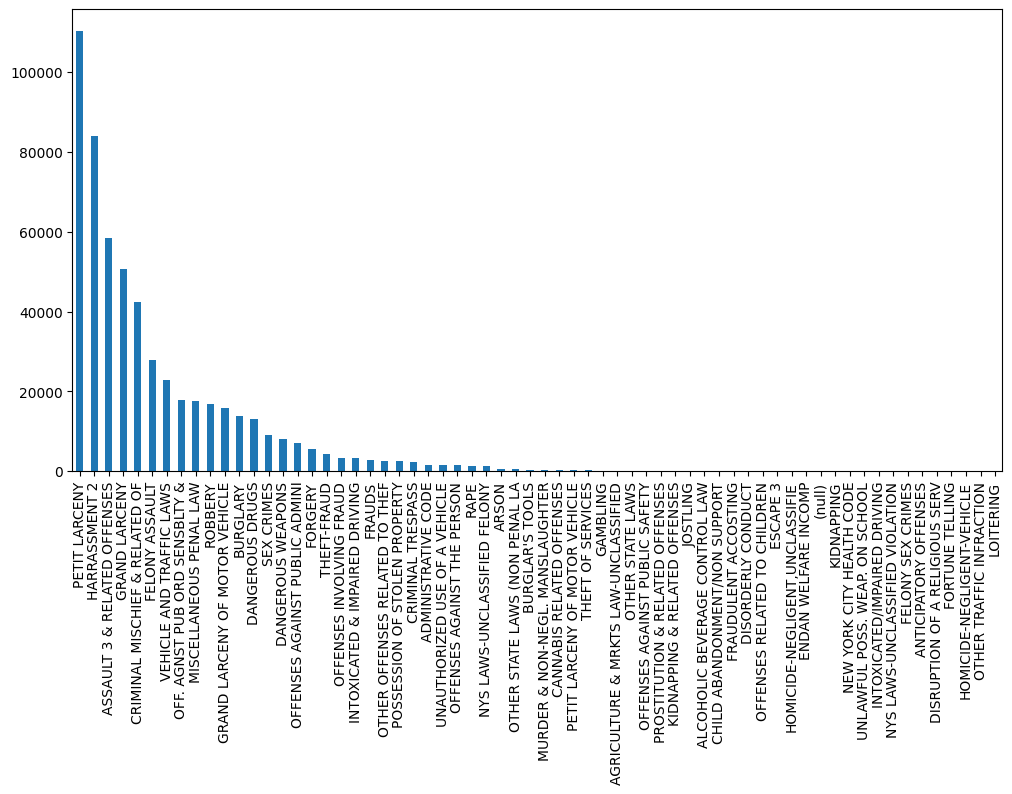

In [16]:
#OFNS_DESC
print(df['OFNS_DESC'].value_counts())
#plot bar
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df['OFNS_DESC'].value_counts().plot(kind='bar')
plt.show()


Index(['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF', 'FELONY ASSAULT',
       'VEHICLE AND TRAFFIC LAWS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'MISCELLANEOUS PENAL LAW', 'ROBBERY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'BURGLARY', 'DANGEROUS DRUGS', 'SEX CRIMES', 'DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ADMINI'],
      dtype='object')


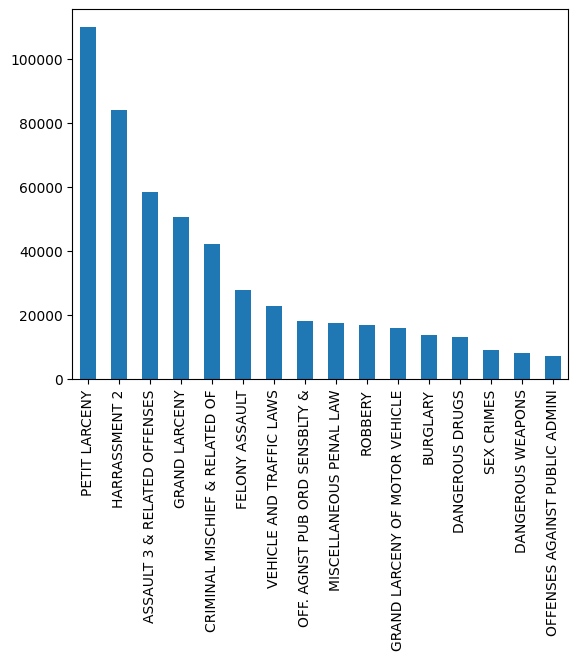

In [11]:
# save the 12 most common crimes as focus_crimes
focuscrimes = df['OFNS_DESC'].value_counts().head(16).index
print(focuscrimes)

plot = df[df['OFNS_DESC'].isin(focuscrimes)]['OFNS_DESC'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Load the GeoJSON data
#geojson = os.path.join(parent_dir, 'lectures', 'data', 'sfpd.geojson.txt')
#with open(geojson) as f:
 #   districts = json.load(f)


geojson = "Exam Project/new-york-city.boroughs.geojson"

#data = data[data["Date"].str.contains("2018") == False]
# Get data for the focuscrimes
data = df[df['OFNS_DESC'].isin(focuscrimes)]

# filter the focus_data by Grand Larceny
grand_larceny = data[data['OFNS_DESC'] == 'GRAND LARCENY']

#drunk_driving = data_focus[data_focus['Category'] == 'DRIVING UNDER THE INFLUENCE']

# Aggregate data by District and DayOfWeek
district_day_counts = grand_larceny.groupby(['', 'DayOfWeek']).size().reset_index(name='Counts')

# Create a df with counts by district on Fridays
#Fridays = district_day_counts[district_day_counts['DayOfWeek'] == 'Friday']

Fridays = district_day_counts
# rename pdDistrict to District
Fridays = Fridays.rename(columns={'PdDistrict': 'District'})
# normalize the counts
Fridays['Counts Normalized'] = (Fridays['Counts'] - Fridays['Counts'].min()) / (Fridays['Counts'].max() - Fridays['Counts'].min())


# Plot the geo data on a map using plotly
fig = px.choropleth_mapbox(Fridays, geojson=districts, locations='District', color='Counts Normalized',
                           color_continuous_scale="Viridis",
                           range_color=(Fridays['Counts Normalized'].min(), Fridays['Counts Normalized'].max()),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5, labels={'Counts':'Normalized Counts'})
                          
fig.update_layout(
    title_text="<b>Incident Count of Drunk Driving on All days of the week by District<b>",
    title_x=0.5,
    title_y=0.9,
    title_xanchor='center',
    title_yanchor='top',
    title_font=dict(
        size=24,
        family="Arial, sans-serif"
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()